In [3]:
import tensorflow as tf

In [7]:
import os
import shutil

source_dir = "/Data/Handwriting_Images"
dest_dir = source_dir

#os.makedirs(dest_dir, exist_ok=True)

#for filename in os.listdir(source_dir):
#    if filename.endswith(".png"):  
        # Extract writer ID from filename, assumes format "wxxxx_syy_pzzz_rqq"
#        writer_id = filename.split("_")[0]  # 'wxxxx'
        
#        writer_folder = os.path.join(dest_dir, writer_id)
#        os.makedirs(writer_folder, exist_ok=True)
        
#        src_path = os.path.join(source_dir, filename)
#        dest_path = os.path.join(writer_folder, filename)
        
#        shutil.move(src_path, dest_path) 

In [17]:
! cd Data/Handwriting_Images && ls

w0001 w0010 w0018 w0027 w0034 w0063 w0074 w0083 w0092 w0124 w0133 w0142 w0151
w0002 w0011 w0020 w0028 w0035 w0064 w0075 w0085 w0093 w0125 w0134 w0143 w0152
w0003 w0012 w0022 w0029 w0036 w0066 w0076 w0086 w0094 w0126 w0135 w0144 w0153
w0004 w0013 w0023 w0030 w0038 w0069 w0077 w0087 w0095 w0128 w0136 w0145 w0154
w0005 w0015 w0024 w0031 w0043 w0070 w0078 w0088 w0121 w0129 w0137 w0147 w0155
w0006 w0016 w0025 w0032 w0061 w0071 w0080 w0089 w0122 w0130 w0138 w0148 w0156
w0009 w0017 w0026 w0033 w0062 w0073 w0082 w0091 w0123 w0131 w0139 w0149


    90 classes

In [13]:
! cd Data/Handwriting_Images/w0001 && ls

w0001_s01_pLND_r01.png w0001_s02_pLND_r01.png w0001_s03_pLND_r01.png
w0001_s01_pLND_r02.png w0001_s02_pLND_r02.png w0001_s03_pLND_r02.png
w0001_s01_pLND_r03.png w0001_s02_pLND_r03.png w0001_s03_pLND_r03.png
w0001_s01_pPHR_r01.png w0001_s02_pPHR_r01.png w0001_s03_pPHR_r01.png
w0001_s01_pPHR_r02.png w0001_s02_pPHR_r02.png w0001_s03_pPHR_r02.png
w0001_s01_pPHR_r03.png w0001_s02_pPHR_r03.png w0001_s03_pPHR_r03.png
w0001_s01_pWOZ_r01.png w0001_s02_pWOZ_r01.png w0001_s03_pWOZ_r01.png
w0001_s01_pWOZ_r02.png w0001_s02_pWOZ_r02.png w0001_s03_pWOZ_r02.png
w0001_s01_pWOZ_r03.png w0001_s02_pWOZ_r03.png w0001_s03_pWOZ_r03.png


    27 Instances each

In [31]:
help(tf.keras.utils.image_dataset_from_directory)

Help on function image_dataset_from_directory in module keras.src.utils.image_dataset_utils:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, pad_to_aspect_ratio=False, data_format=None, verbose=True)
    Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:

    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```

    Then calling `image_dataset_from_directory(main_directory,
    labels='inferred')` will return a `tf.data.Dataset` that yields batches of
    images from the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `cl

In [130]:

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "/Data/Handwriting_Images", 
    labels='inferred',
    color_mode='grayscale',
    image_size=(300,300),
    #batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=42)


Found 2430 files belonging to 90 classes.
Using 1944 files for training.
Using 486 files for validation.


In [43]:
import matplotlib.pyplot as plt

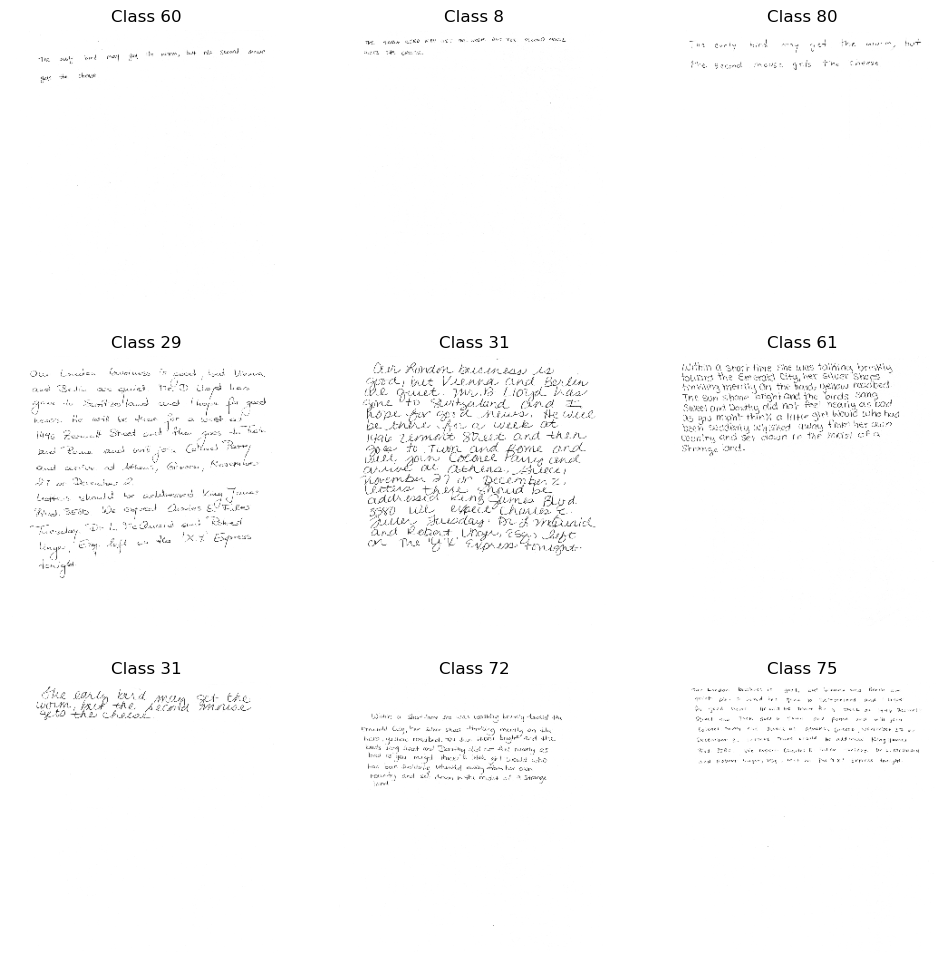

In [132]:
plt.figure(figsize = (12,12))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8").squeeze(), cmap="gray")
        plt.title(f"Class {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

In [77]:
from keras import layers

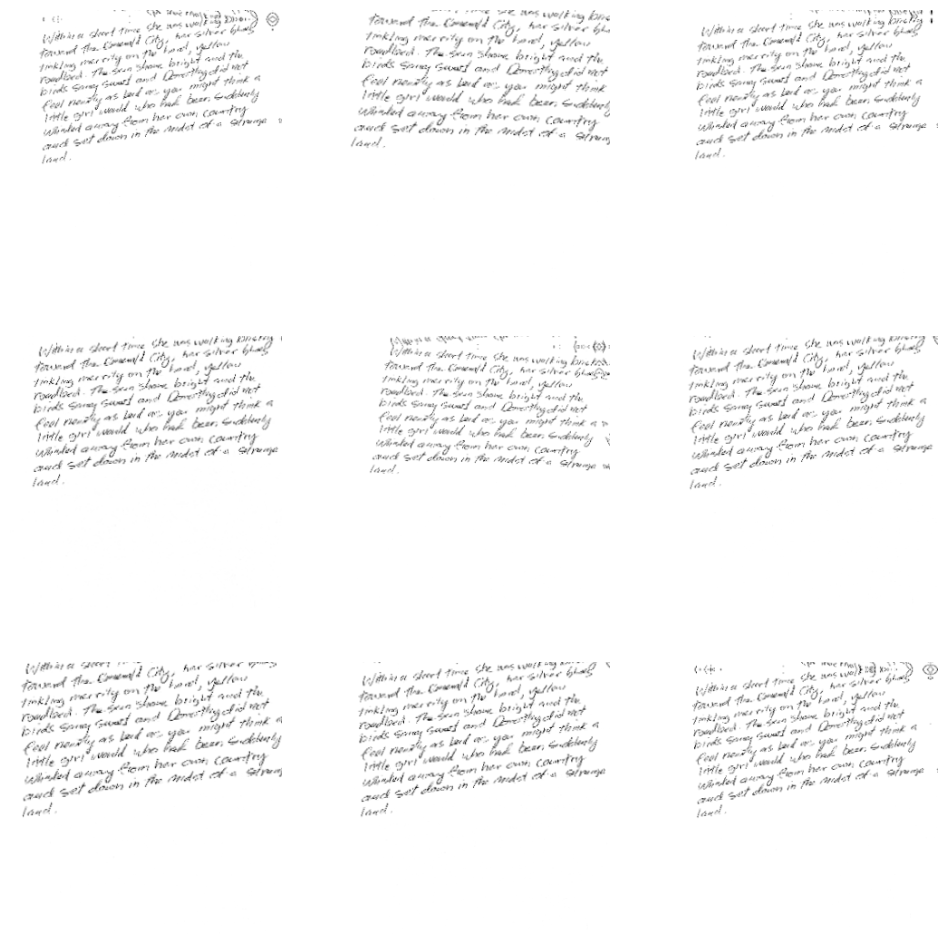

In [140]:
#Augmentations

data_augmentation_layers = [
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images
plt.figure(figsize=(12, 12))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"),cmap="gray")
        plt.axis("off")
